# Contents
01 Importing Libraries
02 Creating histogram for busiest hours of the day
03 Creating bar charts for customer loyalty orders
04 Sampling and Line Plot
05 Age and Dependents Line Plot
06 Scatterplot

# 01 Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Folder location string
path = r'C:\Users\ckra9\Documents\CareerFoundry\Instacart Basket Analysis'

In [3]:
# Importing orders products and customer combined pkl file
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_merge.pkl'))

# 02 Creating histogram for busiest hours of the day

# Q3

<Axes: ylabel='Frequency'>

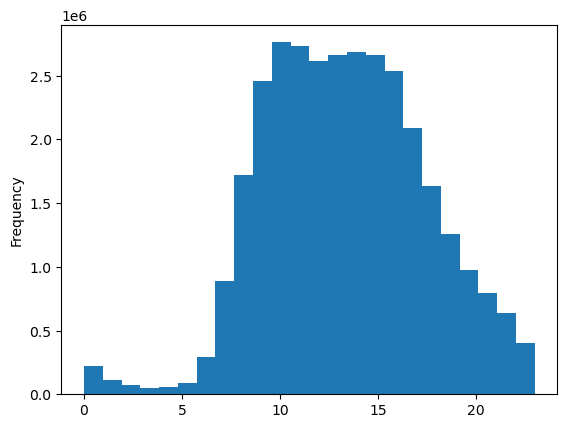

In [4]:
ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

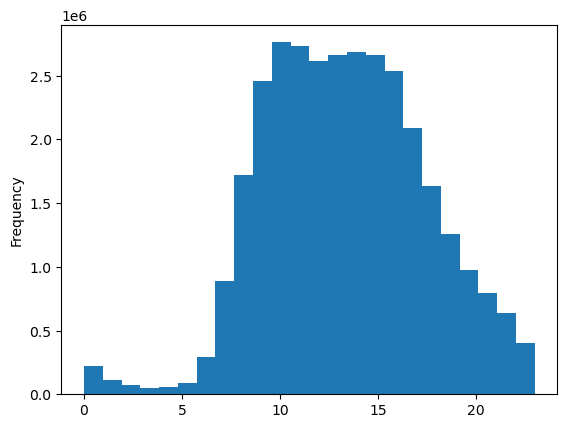

In [5]:
hist = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

This histogram shows what hour of the day purchases are made along with the frequency of those purchases by hour. The busiest hours are from 10am - 3pm.

# 03 Creating bar charts for customer loyalty orders

# Q4

<Axes: xlabel='loyalty_flag'>

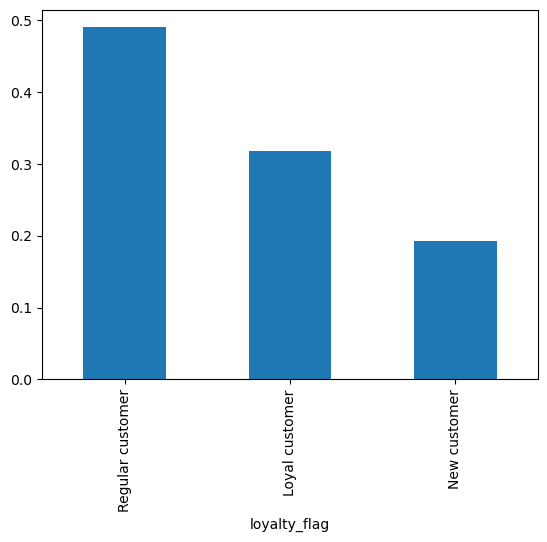

In [6]:
ords_prods_cust['loyalty_flag'].value_counts('order_id').plot.bar()

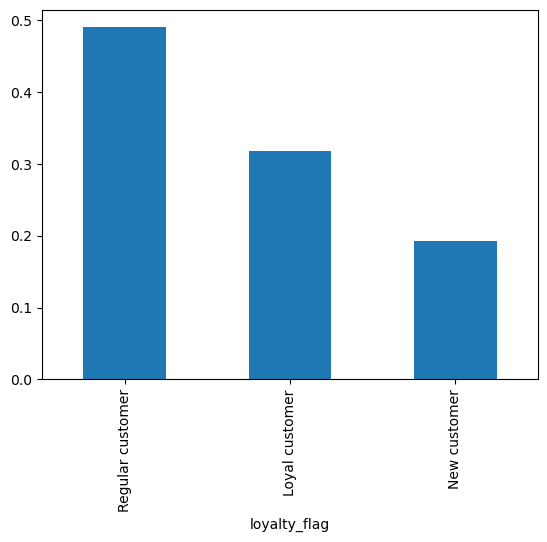

In [7]:
bar = ords_prods_cust['loyalty_flag'].value_counts('order_id').plot.bar()

# 04 Sampling and Line Plot

# Q5

In [10]:
# Creating Sample
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [11]:
# Storing 70% of sample in dataframe big
big = ords_prods_cust[dev]

In [12]:
# Storing 30% of sample in dataframe small
small = ords_prods_cust[~dev]

In [13]:
# checking big and small lengths
len(big) + len(small)

32404859

In [14]:
print(ords_prods_cust.columns.tolist())

['user_id', 'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'prices', '_merge', 'max_order', 'loyalty_flag', 'user_prices_mean', 'spending_flag', 'median_days', 'frequency_flag']


In [15]:
# Creating data frame from small subset
line_ords_prods_cust = small[['prices', 'order_hour_of_day']]

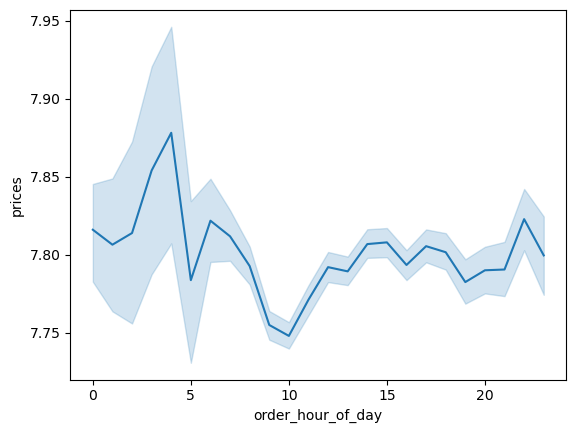

In [16]:
# Creating lineplot
line = sns.lineplot(data = line_ords_prods_cust, x = 'order_hour_of_day',y = 'prices')

Prices are highest around 3 am - 4 am and lowest around 10 am.

# 05 Age and Dependents Line Plot

# Q6

In [17]:
# Creating subset of age and dependents
line2 = small[['age','n_dependants']]

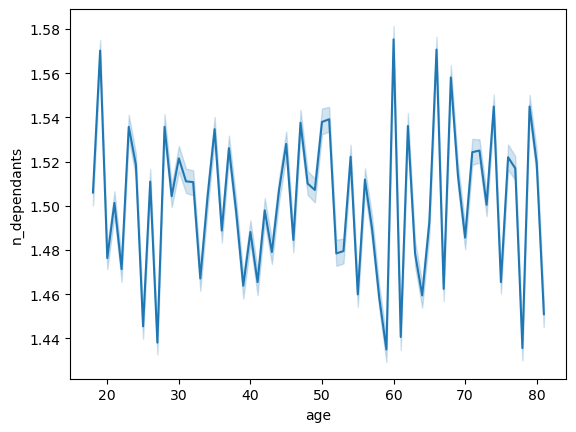

In [18]:
line_age_fam = sns.lineplot(data = line2, x = 'age', y = 'n_dependants')

The line chart shows that the number of dependents by age is quite sporadic. There doesn't seem to be much of a correlation. 

# 06 Scatterplot

# Q7

In [19]:
scatter = small[['age', 'income']]

<Axes: xlabel='age', ylabel='income'>

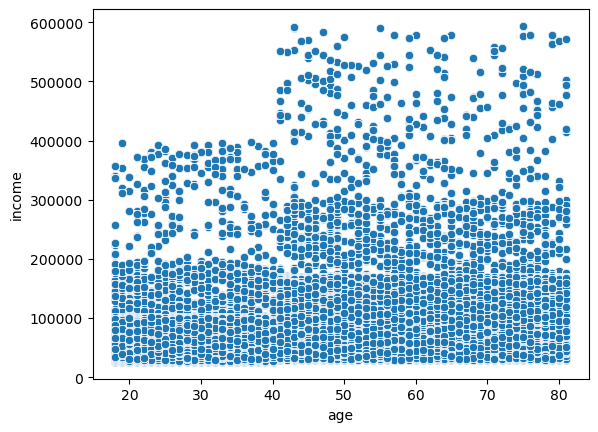

In [20]:
# Scatterplot
sns.scatterplot(x = 'age', y = 'income',data = scatter)

There is a correlation betweeen high incomes and increasing age. The scatterplot shows that around 40 years old more people start making more than 200k a year. It is also shown that this is when customers start making more than 400k annually.  

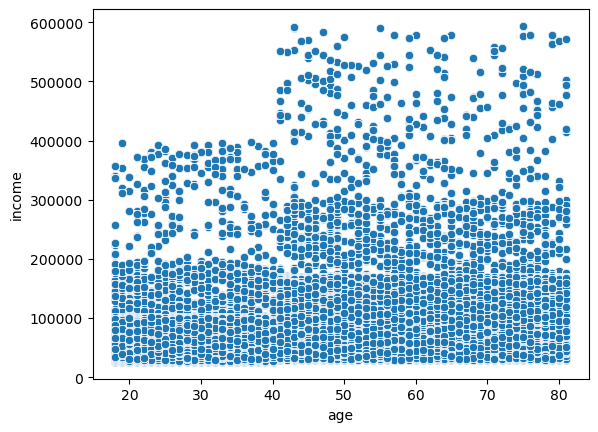

In [21]:
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income',data = scatter)

# Q8

In [22]:
# Exporting visualizations
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hourly_sales.png'))

In [23]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_orders.png'))

In [24]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hourly.png'))

In [25]:
line_age_fam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [26]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))